In [7]:
from scipy.stats import t as t_test
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

### T-Test

1. No matter what distribution the population is, if the sample size is under 30, we can aproximate the sameple means with t-distribution.

2. We don't know the population standard deviation. we only have the sample standard deviation. In this case, we use t-test.

##### Effect Size

The effect size is a statistic that describes how far our observed mean is from the mean for the null hypothesis in standard deviation units. 

The p_value can only tell us if we can reject the null hypothosis, but it can not tell us how large is the difference.

The most common meaure is "Cohen’s d", which is used when we don’t know thee standard deviation of the population

![](Cohen_d.PNG)

| d | Effect Size |
| --- | --- |
| 0.8 | large |
| 0.5 | medium |
| 0.2 | small |

The effect sizes around d = 0.8 or more are considiered large, d = 0.5 is medium and d = 0.2 or less is small.

##### Power Analysis

Power analysis answers questions like "how much statistical power does my study have?" and "how big a sample size do I need?".

![](PowerPlot.png)

If p_value < α (Type I Error), we reject null hypothesis and vice versa. Thus, the critical point seperate H0 and H1. 

When we reject H0, we can choose the sample mean as the mu of the probability distribution of H1 and calculate β (Type II Eorror). The power is simply ( 1 - β ).

[See More](https://www.dummies.com/article/academics-the-arts/math/statistics/finding-the-power-of-a-hypothesis-test-142649/)

### Question 1: 

___
Your friend gets you to sample the amplitude of 74 psych students from a population and obtain a mean amplitude of 74.75 and a standard deviation of 6.2287.

Using an alpha value of α = 0.01, is this observed mean significantly less than an expected amplitude of 77?

What is the effect size? Is the effect size small, medium or large?

#from t_test_tutorial.pdf

In [8]:
n = 74
sample_mean = 74.75
sample_std = 6.2287
a = 0.01
mu = 77

H<sub>0 : mu = 77

H<sub>1 : mu < 77

In [13]:
sample_mean_std = sample_std / np.sqrt(n)
d = (sample_mean - mu) / sample_mean_std
df= n - 1
p_value = t_test.cdf(d, df=df)

effect_size = abs( (sample_mean - mu) / sample_std )
print("p_value: ", p_value)
print("Effect Size: ", effect_size)

p_value:  0.0013443871509273798
Effect Size:  0.36123107550532213


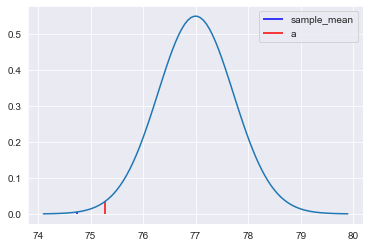

In [15]:
x_a_left = t_test.ppf(a, df=df, loc=mu, scale=sample_mean_std)
x = np.linspace( mu - sample_mean_std * 4,
                 mu + sample_mean_std * 4,
                 num=100)
y = t_test.pdf(x, df=df, loc=mu, scale=sample_mean_std)
sns.lineplot(x=x, y=y)
plt.vlines(sample_mean, 0, t_test.pdf(sample_mean, df=df, loc=mu, scale=sample_mean_std), 'b', label='sample_mean')
plt.vlines(x_a_left, 0, t_test.pdf(x_a_left, df=df, loc=mu, scale=sample_mean_std), 'r', label='a')
plt.legend()

#### Ans:

Since p_value < α, we reject H<sub>0. 

The observed mean is significant less than an expected amplitude of 77.

The effect size is 0.36 which is medium.